# T1.1
##### Carlos Leandro
> Meio ambiente

### I - Área Florestal

Dados entre 1990 e 2016

> 1.1) Quanto de área florestal o mundo perdeu? (km2) (Durante os anos)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt.rcParams.update({'font.size': 16})

In [2]:
df_area_florestal_km2 = pd.read_excel('t11a-area_florestal_km2.xlsx', index_col=0, na_values=['..']).dropna()
df_area_florestal_km2 = df_area_florestal_km2.apply(lambda s: s.apply(lambda v: float(v.replace(',', ''))));

In [3]:
soma_area_florestal_km2 = df_area_florestal_km2.sum()

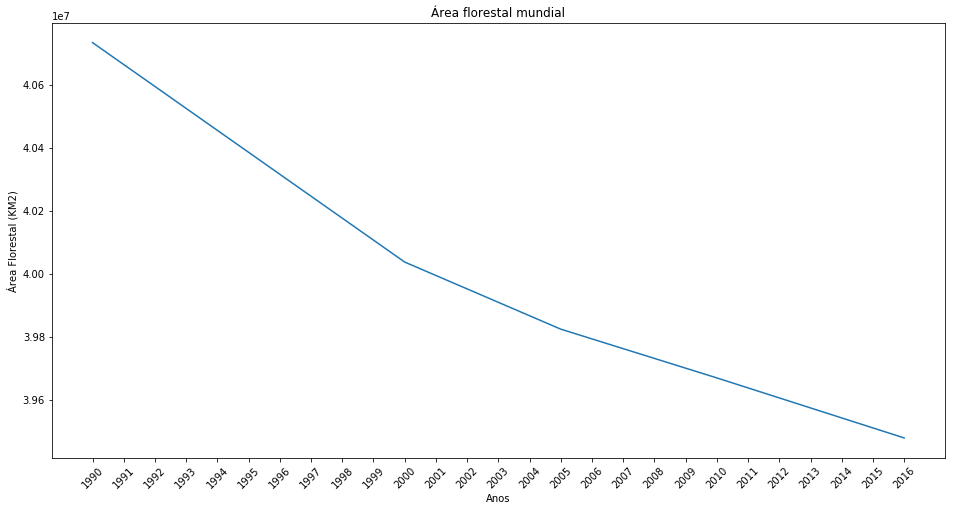

In [4]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45)

ax.set(xlabel='Anos', ylabel='Área Florestal (KM2)', title='Área florestal mundial')
ax.plot(soma_area_florestal_km2.index, soma_area_florestal_km2)

plt.show()

In [5]:
maior_km2 = soma_area_florestal_km2.max()
menor_km2 = soma_area_florestal_km2.min()
perda_km2 = maior_km2-menor_km2

print('O mundo perdeu cerca de {:.2f}% de floresta, equivalente a {:.0f}KM2'
      .format(perda_km2/maior_km2*100, perda_km2))

O mundo perdeu cerca de 3.08% de floresta, equivalente a 1253900KM2


> 1.2) Quanto de área florestal o Brasil perdeu? (km2) (Durante os anos)

In [6]:
sr_area_florestal_brasileira_km2 = df_area_florestal_km2.loc['Brazil']

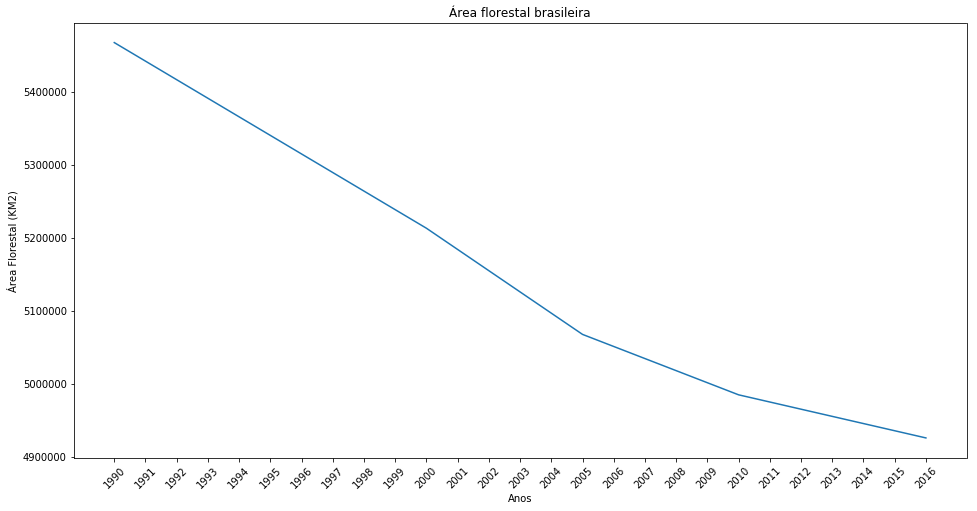

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45)

ax.set(xlabel='Anos', ylabel='Área Florestal (KM2)', title='Área florestal brasileira')
ax.plot(sr_area_florestal_brasileira_km2.index, sr_area_florestal_brasileira_km2)

plt.show()

In [8]:
maior_km2_brasileira = sr_area_florestal_brasileira_km2.max()
menor_km2_brasileira = sr_area_florestal_brasileira_km2.min()
perda_km2_brasileira = maior_km2_brasileira-menor_km2_brasileira

print('O Brasil perdeu cerca de {:.2f}% de floresta, equivalente a {:.0f}KM2'
      .format(perda_km2_brasileira/maior_km2_brasileira*100, perda_km2_brasileira))

O Brasil perdeu cerca de 9.90% de floresta, equivalente a 541510KM2


> 1.3) Quanto o Brasil desmatou em relação ao desmatamento mundial?

In [9]:
print('O Brasil desmatou cerca de {:.2f}% de floresta em relação ao desmatamento mundial'
      .format(perda_km2_brasileira/perda_km2*100))

O Brasil desmatou cerca de 43.19% de floresta em relação ao desmatamento mundial


> 2.1) Quais países mais aumentaram o desmatamento?

In [10]:
df_coeficientes_desmatamento = pd.DataFrame(index=['Coeficiente'])
anos = np.array(df_area_florestal_km2.T.index).astype(int).reshape(-1, 1)
for pais in df_area_florestal_km2.index:
    area_florestal_pais = df_area_florestal_km2.loc[pais]
    modelo = LinearRegression()
    modelo.fit(anos, area_florestal_pais)
    df_coeficientes_desmatamento[pais] = modelo.coef_

df_coeficientes_desmatamento = df_coeficientes_desmatamento.T
df_coeficientes_desmatamento.sort_values(by='Coeficiente', inplace=True)

In [11]:
maiores_desmatadores_index = df_coeficientes_desmatamento.head().index
print('Os países que mais aumentaram o desmatamento foram')
print(list(maiores_desmatadores_index))

Os países que mais aumentaram o desmatamento foram
['Brazil', 'Indonesia', 'Nigeria', 'Tanzania', 'Myanmar']


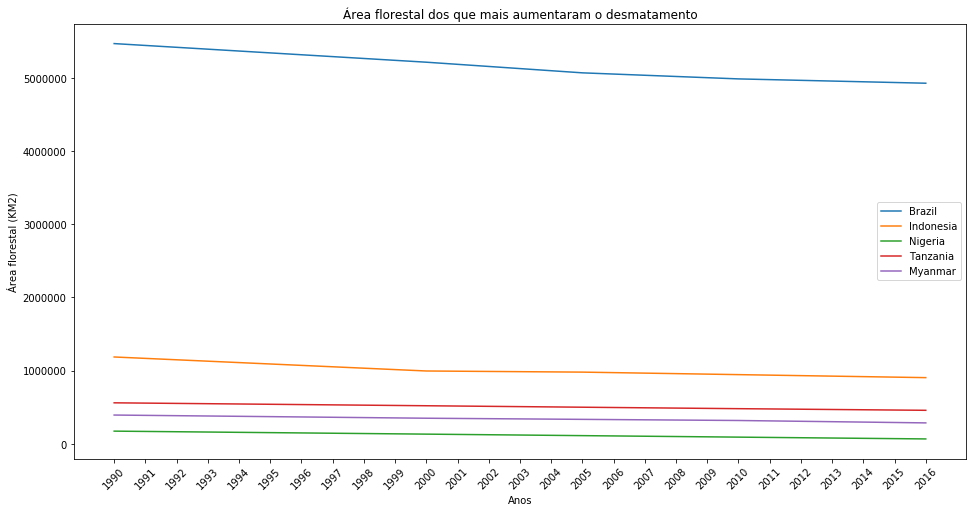

In [12]:
maiores_desmatadores_df = df_area_florestal_km2.loc[maiores_desmatadores_index]

fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45)

ax.set(xlabel='Anos', ylabel='Área florestal (KM2)', title='Área florestal dos que mais aumentaram o desmatamento')
ax.plot(maiores_desmatadores_df.T)

plt.legend(labels=maiores_desmatadores_df.index, loc='best')
plt.show()

> 2.2) Quanto desmataram?

In [13]:
maiores_desmatadores_df['perda_ganho_florestal']=maiores_desmatadores_df['2016']-maiores_desmatadores_df['1990']

In [14]:
print('Quantidade de area florestal perdida em KM2 dentre os mais desmataram')
maiores_desmatadores_df['perda_ganho_florestal']*-1

Quantidade de area florestal perdida em KM2 dentre os mais desmataram


Brazil       541510.0
Indonesia    282194.0
Nigeria      106506.0
Tanzania     102320.0
Myanmar      107234.0
Name: perda_ganho_florestal, dtype: float64

> 3.1) Algum país aumentou a área florestal?

In [15]:
paises_com_aumento_florestal = df_coeficientes_desmatamento[df_coeficientes_desmatamento>0].dropna()
paises_com_aumento_florestal.shape

(90, 1)

In [16]:
print('Sim, cerca de 90 países tiveram aumento florestal')

Sim, cerca de 90 países tiveram aumento florestal


> 3.2) Quais países mais reflorestaram?

In [17]:
print('Os países que mais reflorestaram foram')
paises_que_mais_reflorestaram = list(paises_com_aumento_florestal.T)[:-6:-1]
print(paises_que_mais_reflorestaram)

Os países que mais reflorestaram foram
['China', 'United States', 'India', 'Russian Federation', 'Vietnam']


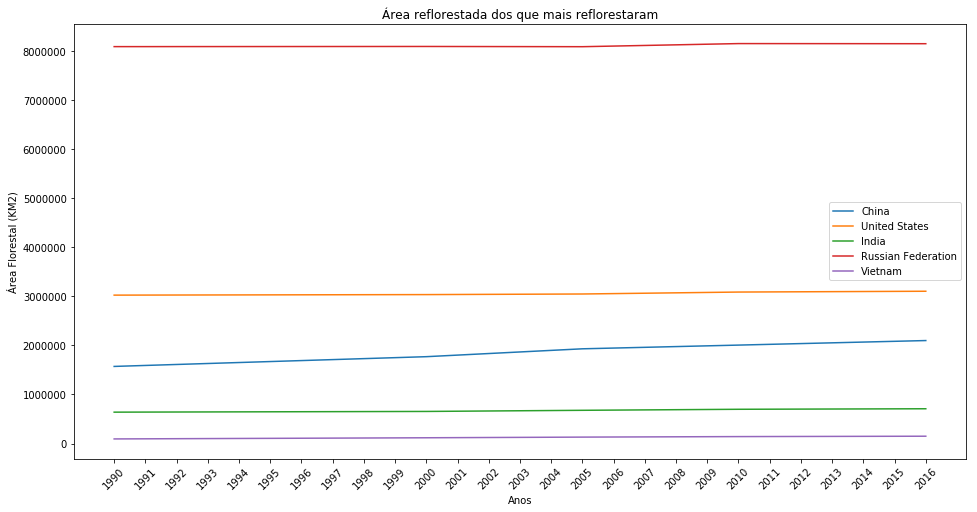

In [18]:
paises_que_mais_reflorestaram_df = df_area_florestal_km2.loc[paises_que_mais_reflorestaram]

fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45)

ax.set(xlabel='Anos', ylabel='Área Florestal (KM2)', title='Área reflorestada dos que mais reflorestaram')
ax.plot(paises_que_mais_reflorestaram_df.T)

plt.legend(labels=paises_que_mais_reflorestaram_df.index, loc='best')
plt.show()

> 3.3) Quanto estes reflorestaram?

In [51]:
paises_que_mais_reflorestaram_df['ganho_florestal']=\
    paises_que_mais_reflorestaram_df['2016']-paises_que_mais_reflorestaram_df['1990']
print('Quantidade de area florestal ganha em KM2 dentre os que mais reflorestaram')
paises_que_mais_reflorestaram_df['ganho_florestal']

Quantidade de area florestal ganha em KM2 dentre os que mais reflorestaram


 
China                 527229.1
United States          79200.0
India                  69214.0
Russian Federation     59395.0
Vietnam                55390.0
Name: ganho_florestal, dtype: float64

Fonte: [World Bank](https://data.worldbank.org/indicator/AG.LND.FRST.K2?view=chart)

Curiosidade: [Noticia sobre o reflorestamento chines](https://www.ecycle.com.br/component/content/article/9-no-mundo/6238-programa-reflorestamento-florestal-china.html)

### II - Área agrícola

> 4) Quanto cresceu durante os anos? (km2)

In [20]:
df_area_agricola_km2 = pd.read_excel('t11b-area_agricola_km2.xlsx', index_col=0, na_values=['NA']).dropna()

In [21]:
soma_areas_agricolas = df_area_agricola_km2.sum()

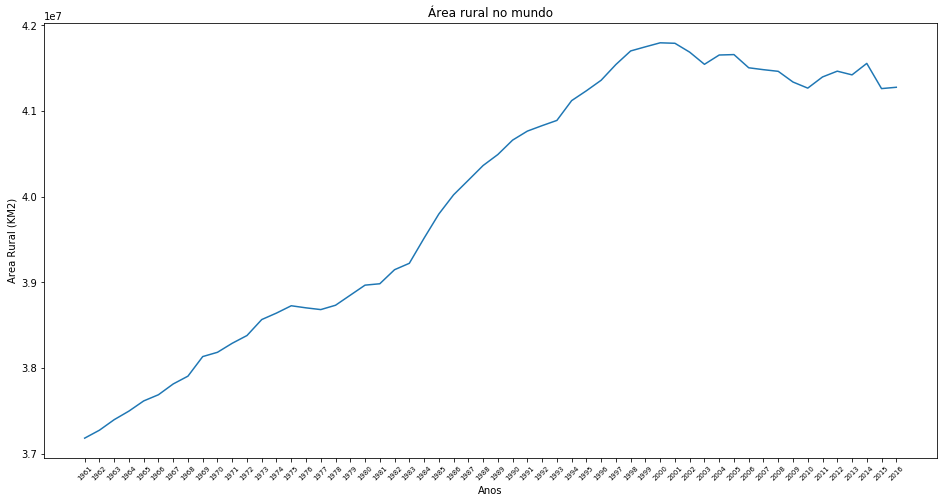

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45, labelsize='x-small')

ax.set(xlabel='Anos', ylabel='Area Rural (KM2)', title='Área rural no mundo')
ax.plot(soma_areas_agricolas)

plt.show()

In [23]:
maior_area_agricultura = soma_areas_agricolas.max()
menor_area_agricultura = soma_areas_agricolas.min()
ganho_area_agricultura = maior_area_agricultura-menor_area_agricultura

print('As areas agricolas do mundo cresceram cerca de {:.2f}% de floresta, equivalente a {:.0f}KM2'
      .format(ganho_area_agricultura/maior_area_agricultura*100, ganho_area_agricultura))
print('Alem disso, observando o grafico acima, desde 2000 essa expansão parou e aparenta estar diminuido')

As areas agricolas do mundo cresceram cerca de 11.05% de floresta, equivalente a 4617008KM2
Alem disso, observando o grafico acima, desde 2000 essa expansão parou e aparenta estar diminuido


> 5) Existe correlação com o desmatamento?

In [24]:
soma_area_florestal_km2.corr(soma_areas_agricolas.loc['1990':'2017'])

-0.5550857515551622

Existe uma correlação negativa moderada entre o crescimento das áreas agrícolas e o desmatamento das florestas no mundo. Porém, a área agrícola é só uma fração da área rural. Também faltou considerar as áreas urbanas. Um dataset com estes dados talvez tornasse essa correlação mais forte, porém não foi encontrado.

Fonte: [World Bank](https://data.worldbank.org/indicator/AG.LND.AGRI.K2?view=chart)

### III - CO2 na atmosfera

> 6.1) Qual a emissão de CO2 no mundo? (kt = mil toneladas) (Durante os anos)

In [25]:
df_emissao_co2 = pd.read_excel('t11c-emissao_co2_kt.xlsx', index_col=0, na_values=['..']).dropna()
df_emissao_co2 = df_emissao_co2.apply(lambda s: s.apply(lambda v: float(v.replace(',', ''))));

In [26]:
sr_emissao_co2_mundial = df_emissao_co2.sum()

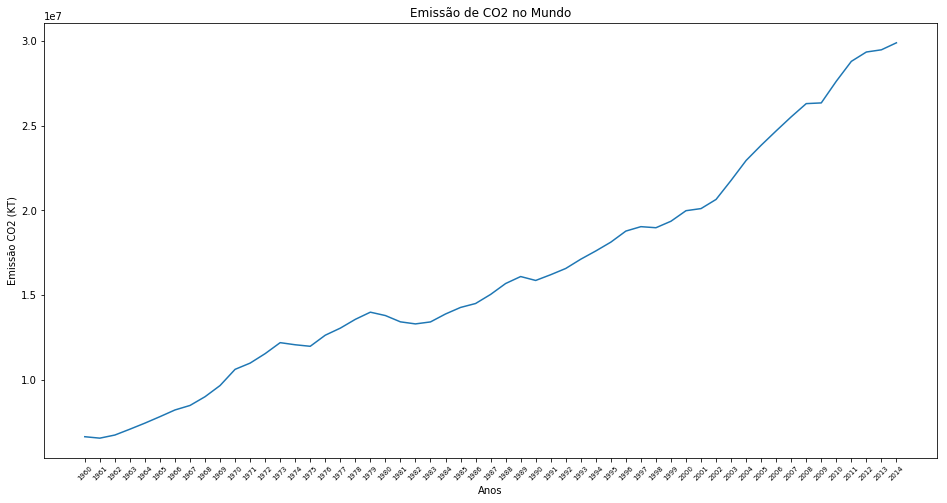

In [27]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45, labelsize='x-small')

ax.set(xlabel='Anos', ylabel='Emissão CO2 (KT)', title='Emissão de CO2 no Mundo')
ax.plot(sr_emissao_co2_mundial)

#plt.legend(labels=soma_areas_agricolas.index, loc='best')
plt.show()

> 6.2) Qual a emissão de CO2 no Brasil? (Durante os anos)

In [28]:
sr_emissao_co2_brasil = df_emissao_co2.loc['Brazil']

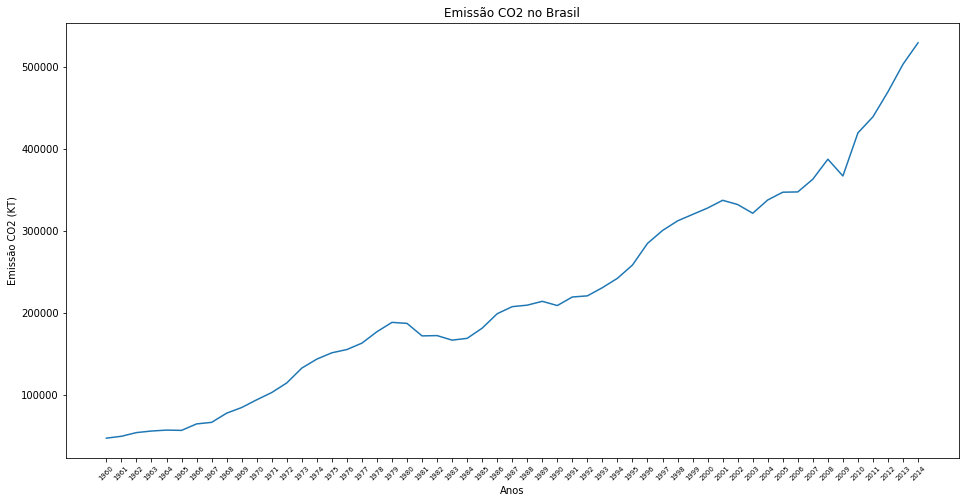

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45, labelsize='x-small')

ax.set(xlabel='Anos', ylabel='Emissão CO2 (KT)', title='Emissão CO2 no Brasil')
ax.plot(sr_emissao_co2_brasil)

#plt.legend(labels=soma_areas_agricolas.index, loc='best')
plt.show()

> 7.1) Quais países mais aumentaram a emissão?

In [30]:
sr_coeficientes_emissao_co2 = pd.DataFrame(index=['Coeficiente'])
anos = np.array(df_emissao_co2.T.index).astype(int).reshape(-1, 1)
for pais in df_emissao_co2.index:
    emissao_co2_pais = df_emissao_co2.loc[pais]
    modelo = LinearRegression()
    modelo.fit(anos, emissao_co2_pais)
    sr_coeficientes_emissao_co2[pais] = modelo.coef_

sr_coeficientes_emissao_co2 = sr_coeficientes_emissao_co2.T
sr_coeficientes_emissao_co2.sort_values(by='Coeficiente', inplace=True)

In [31]:
maiores_emissores_index = sr_coeficientes_emissao_co2.tail()[::-1].index
print('Os países que mais aumentaram a emissão de CO2 foram')
print(list(maiores_emissores_index))

Os países que mais aumentaram a emissão de CO2 foram
['China', 'United States', 'India', 'Japan', 'Korea, Rep.']


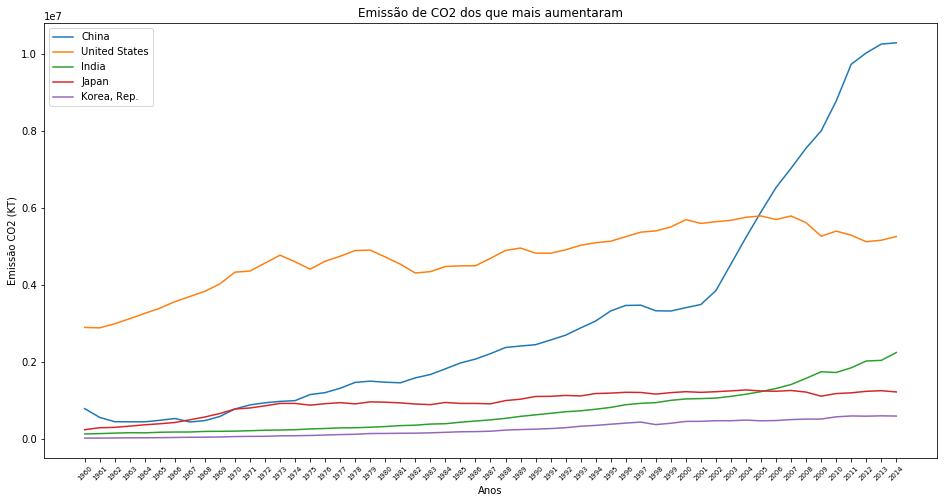

In [32]:
df_mais_aumentaram_emissao_co2 = df_emissao_co2.loc[maiores_emissores_index]

fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45, labelsize='x-small')

ax.set(xlabel='Anos', ylabel='Emissão CO2 (KT)', title='Emissão de CO2 dos que mais aumentaram')
ax.plot(df_mais_aumentaram_emissao_co2.T)

plt.legend(labels=df_mais_aumentaram_emissao_co2.index, loc='best')
plt.show()

> 7.2) Quais países mais diminuiram a emissão de CO2? 

In [33]:
menores_emissores_index = sr_coeficientes_emissao_co2.head().index
print('Os países que mais aumentaram a emissão de CO2 foram')
print(list(menores_emissores_index))

Os países que mais aumentaram a emissão de CO2 foram
['United Kingdom', 'France', 'Sweden', 'Romania', 'Hungary']


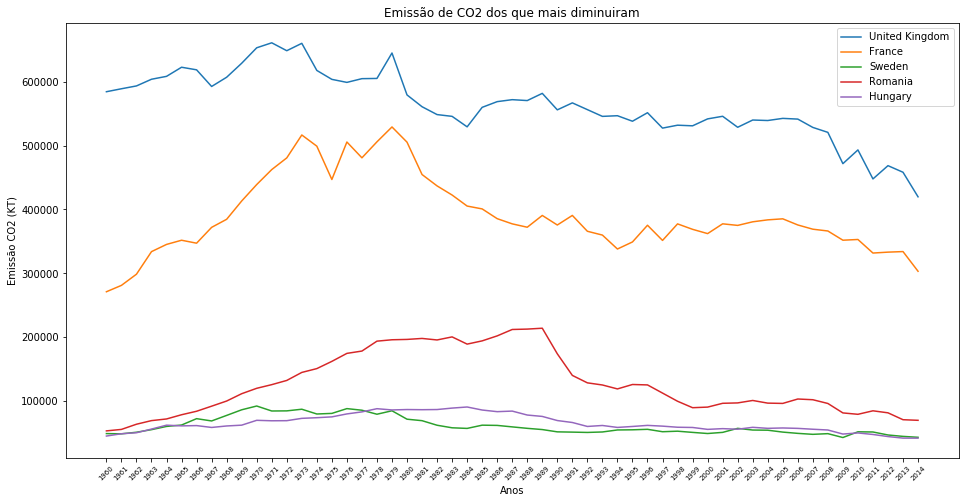

In [34]:
df_mais_diminuiram_emissao_co2 = df_emissao_co2.loc[menores_emissores_index]

fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45, labelsize='x-small')

ax.set(xlabel='Anos', ylabel='Emissão CO2 (KT)', title='Emissão de CO2 dos que mais diminuiram')
ax.plot(df_mais_diminuiram_emissao_co2.T)

plt.legend(labels=df_mais_diminuiram_emissao_co2.index, loc='best')
plt.show()

> 8) Qual a concentração de CO2 na atmosfera? (ppm = g / tonelada) (Durante os anos)

In [35]:
df_concentracao_co2 = pd.read_csv('t11c-concentracao_co2_ppm.txt', index_col=0, delim_whitespace=True, comment='#')

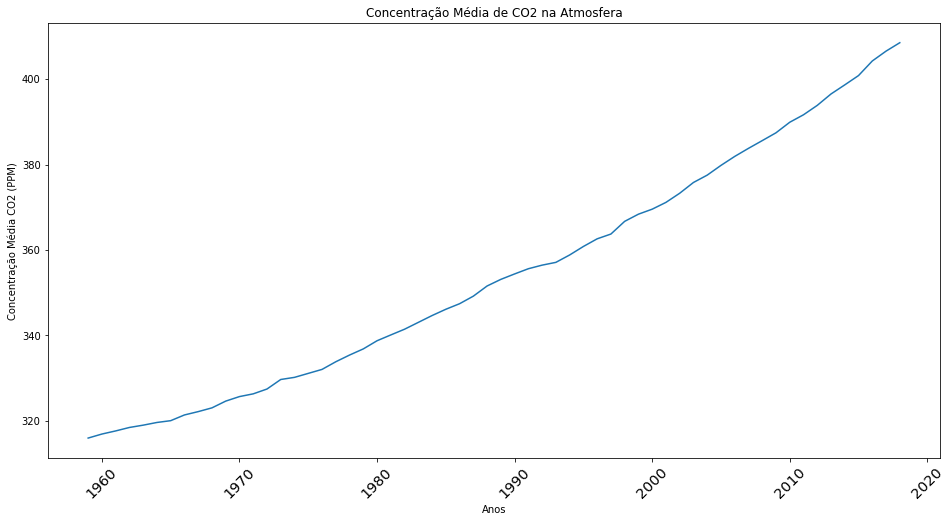

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45, labelsize='x-large')

ax.set(xlabel='Anos', ylabel='Concentração Média CO2 (PPM)', title='Concentração Média de CO2 na Atmosfera')
ax.plot(df_concentracao_co2['mean'])

#plt.legend(labels=soma_areas_agricolas.index, loc='best')
plt.show()

> 9) Existe correlação com o desmatamento?

In [37]:
pd.Series(soma_area_florestal_km2.values).corr(pd.Series(df_concentracao_co2.loc[1990:2016]['mean'].values))

-0.9684773510960597

Existe uma correlação negativa muito forte entre o aumento da concentração de CO2 na atmosfera e o desmatamento, mas vale ressaltar que isso não implica uma relação de causalidade. Arvores absorvem CO2, portanto podemos concluir que existe uma contrubuição do desmatamento para o acumulo de CO2 crescente na atmosfera.

A localização das estações de medição de CO2 da atmosfera

![CO2 Sampling Stations](http://scrippsco2.ucsd.edu/assets/images/co2_stations.png)

Fontes: [World Bank](https://data.worldbank.org/indicator/EN.ATM.CO2E.KT?view=chart), [NOAA](https://www.esrl.noaa.gov/gmd/ccgg/trends/gl_data.html)

### IV - Temperatura global

> 10) Qual a temperatura média global? (Durante os anos)

In [38]:
df_temperatura_global_mensal = pd.read_csv('t11d-temperatura_global_media_c.csv', index_col=0)
df_temperatura_global_mensal = df_temperatura_global_mensal[
    ['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature']]

In [39]:
df_temperatura_media_global = pd.DataFrame()
for ano in range(2015, 1800, -1):
    dados_ano = df_temperatura_global_mensal.filter(like=str(ano), axis=0).dropna()
    if(dados_ano.shape[0]>0):
        df_temperatura_media_global[ano] = dados_ano.mean()

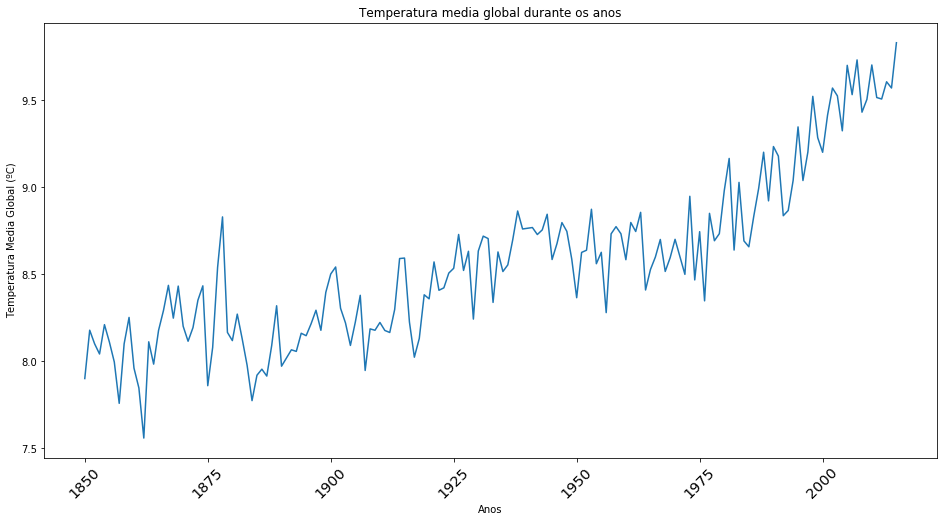

In [40]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45, labelsize='x-large')

ax.set(xlabel='Anos', ylabel='Temperatura Media Global (ºC)', title='Temperatura media global durante os anos')
ax.plot(df_temperatura_media_global.loc['LandAverageTemperature'])

#plt.legend(labels=soma_areas_agricolas.index, loc='best')
plt.show()

In [41]:
anos = np.array(df_temperatura_media_global.T.index).astype(int).reshape(-1, 1)
modelo_polinomial= PolynomialFeatures(degree=3)
x_polinomial = modelo_polinomial.fit_transform(anos)
model_linear = LinearRegression()
model_linear.fit(x_polinomial, df_temperatura_media_global.loc['LandAverageTemperature'])
y_polinomial = model_linear.predict(x_polinomial)

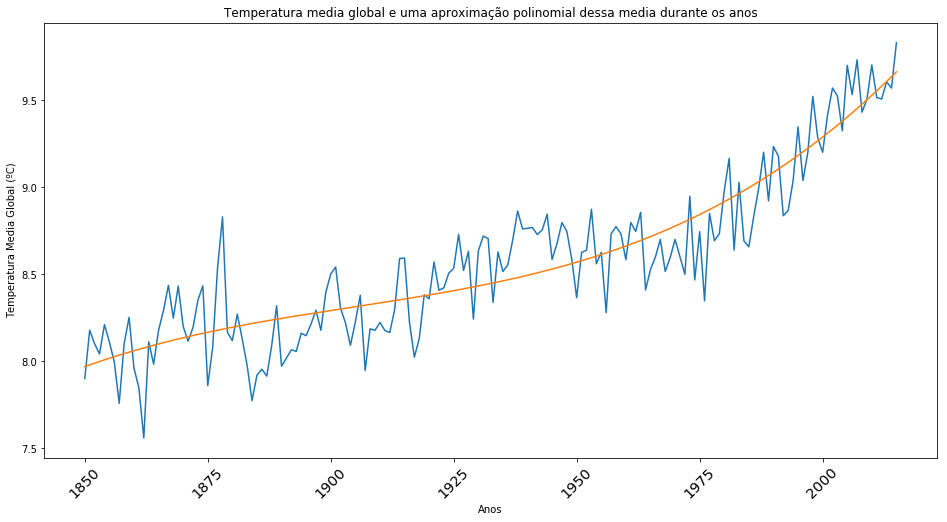

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params(axis='x', rotation=45, labelsize='x-large')

ax.set(xlabel='Anos', ylabel='Temperatura Media Global (ºC)', 
       title='Temperatura media global e uma aproximação polinomial dessa media durante os anos')
ax.plot(df_temperatura_media_global.loc['LandAverageTemperature'])
ax.plot(anos, y_polinomial)

#plt.legend(labels=soma_areas_agricolas.index, loc='best')
plt.show()

> 11.1) Existe correlação entre a variação média de temperatura global e a concentração de CO2 na atmosfera?

In [43]:
sr_temperatura_global_media_suavizada = pd.Series(y_polinomial, index=df_temperatura_media_global.T.index)

sr_temperatura_global_media_suavizada.loc[range(1959,2016)].corr(df_concentracao_co2['mean'])

0.9995054159195134

Existe uma correlação positiva muito forte entre os dois, ou seja, ambos crescem parecido no decorrer dos anos. Novamente, essa relação não implica causalidade, mas com certeza contribui.

> 11.2) Existe correlação entre a temperatura média global e o desmatamento?

In [49]:
sr_temperatura_global_media_suavizada = pd.Series(y_polinomial, index=df_temperatura_media_global.T.index)

pd.Series(soma_area_florestal_km2.loc['1990':'2015'].
          values).corr(pd.Series(sr_temperatura_global_media_suavizada.loc[range(1990,2016)].values))

-0.9724869600265993

Mais uma correlação negativa muito forte, ou seja, um aparenta ser o inverso do outro no decorrer dos anos.

Fonte: [Earth Surface Temperature Data](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalTemperatures.csv)